In [1]:
import skimage.io as io
import glob
import random as r
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK

import tensorflow as tf
import skimage.color as color
import math
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from keras.layers import Input, UpSampling2D,BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

Using TensorFlow backend.


In [2]:
img_size = 240
K.set_image_dim_ordering("th")
#K.backend.image_dim_ordering("th")
#K.image_data_format 

img_size = 240      #original img size is 240*240
smooth = 0.005 

sharp = False       # sharpen filter
LR = 1e-4

In [9]:
def t2_flair_load (img_path, img_type, img_num, img_from):
#bartab@inf.u-szeged.hu
    files = glob.glob(img_path + img_type, recursive=True)
    files = files[img_from:img_num]
    img_t1 = []
    img_t1c = []
    img_t2 = []
    img_flair = []
    img_full=np.zeros((img_num,2,155,240,240))
    
    n=0
    for file in files:
        print('Processing---', file)
        img = io.imread(file, plugin='simpleitk')
        print(img.shape)
        
        if img.std() != 0 :
            img = (img - img.mean()) / img.std()  # normalization => zero mean   !!!care for the std=0 problem
        else: return print('std = 0 !')
        img = img.astype('float32')
        
        for k in range(0, 3) :

            img_t1 = img[0,:,:,:]
            img_t1c = img[1,:,:,:]
            img_t2 = img[2,:,:,:]
            img_flair = img[3,:,:,:]
            
            img_t2 = img_t2.reshape((1,)+img_t2.shape)
            img_flair = img_flair.reshape((1,)+img_flair.shape)
            img_t2 = img_t2.reshape((1,)+img_t2.shape)
            img_flair = img_flair.reshape((1,)+img_flair.shape)
            
        img_full[n,0,:,:,:] = img_t2[0,0,:,:,:]
        img_full[n,1,:,:,:] = img_flair[0,0,:,:,:]
        n= n+1
        print('eljutott az iteráció végére')
    return np.array(img_full)

def label_loader(img_path, img_type, img_num, img_from):
    files = glob.glob(img_path + img_type, recursive=True)
    files = files[img_from:img_num]
    label_full=np.zeros((img_num,155,240,240))
    
    n=0
    for file in files:
        print('Processing---', file)
        img = io.imread(file, plugin='simpleitk')
        #print(img.shape)
        img[img != 0] = 1
        img = img.reshape((1,)+img.shape)
    
        label_full[n,:,:,:] = img[0,:,:,:]
        n = n+1
        
    return np.array(label_full)

In [ ]:
#call the loaders
img_num = 16
img_from=0
img_full = t2_flair_load('D:/Diplomamunka/adatok/imagesTr/', '**/*.nii.gz', img_num, img_from)
print(img_full.shape)

label_full = label_loader('D:/Diplomamunka/adatok/labelsTr/', '**/*.nii.gz', img_num, img_from)
print(label_full.shape)

Processing--- D:/Diplomamunka/adatok/imagesTr\BRATS_001.nii.gz
(4, 155, 240, 240)
eljutott az iteráció végére
Processing--- D:/Diplomamunka/adatok/imagesTr\BRATS_002.nii.gz
(4, 155, 240, 240)
eljutott az iteráció végére
Processing--- D:/Diplomamunka/adatok/imagesTr\BRATS_003.nii.gz
(4, 155, 240, 240)
eljutott az iteráció végére
Processing--- D:/Diplomamunka/adatok/imagesTr\BRATS_004.nii.gz
(4, 155, 240, 240)
eljutott az iteráció végére
Processing--- D:/Diplomamunka/adatok/imagesTr\BRATS_005.nii.gz
(4, 155, 240, 240)
eljutott az iteráció végére
Processing--- D:/Diplomamunka/adatok/imagesTr\BRATS_006.nii.gz
(4, 155, 240, 240)
eljutott az iteráció végére
Processing--- D:/Diplomamunka/adatok/imagesTr\BRATS_007.nii.gz
(4, 155, 240, 240)
eljutott az iteráció végére
Processing--- D:/Diplomamunka/adatok/imagesTr\BRATS_008.nii.gz
(4, 155, 240, 240)
eljutott az iteráció végére
Processing--- D:/Diplomamunka/adatok/imagesTr\BRATS_009.nii.gz
(4, 155, 240, 240)
eljutott az iteráció végére
Processing

In [10]:
i=2

img_from = (i-1)*8
img_num = i*8
img_full = t2_flair_load('D:/Diplomamunka/adatok/imagesTr/', '**/*.nii.gz', img_num, img_from)
print(img_full.shape)

label_full = label_loader('D:/Diplomamunka/adatok/labelsTr/', '**/*.nii.gz', img_num, img_from)
print(label_full.shape)

Processing--- D:/Diplomamunka/adatok/imagesTr\BRATS_009.nii.gz
(4, 155, 240, 240)
eljutott az iteráció végére
Processing--- D:/Diplomamunka/adatok/imagesTr\BRATS_010.nii.gz
(4, 155, 240, 240)
eljutott az iteráció végére
Processing--- D:/Diplomamunka/adatok/imagesTr\BRATS_011.nii.gz
(4, 155, 240, 240)
eljutott az iteráció végére
Processing--- D:/Diplomamunka/adatok/imagesTr\BRATS_012.nii.gz
(4, 155, 240, 240)
eljutott az iteráció végére
Processing--- D:/Diplomamunka/adatok/imagesTr\BRATS_013.nii.gz
(4, 155, 240, 240)
eljutott az iteráció végére
Processing--- D:/Diplomamunka/adatok/imagesTr\BRATS_014.nii.gz
(4, 155, 240, 240)
eljutott az iteráció végére
Processing--- D:/Diplomamunka/adatok/imagesTr\BRATS_015.nii.gz
(4, 155, 240, 240)
eljutott az iteráció végére
Processing--- D:/Diplomamunka/adatok/imagesTr\BRATS_016.nii.gz
(4, 155, 240, 240)
eljutott az iteráció végére
(16, 2, 155, 240, 240)
Processing--- D:/Diplomamunka/adatok/labelsTr\BRATS_009.nii.gz
Processing--- D:/Diplomamunka/adat

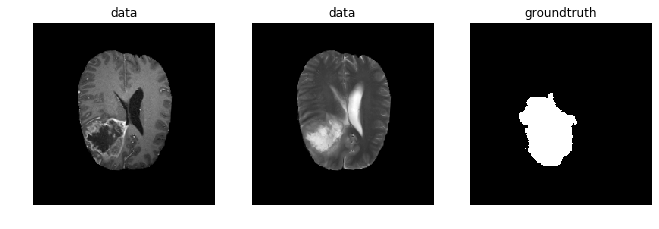

In [8]:
#print to show the arrays 
img_example=5
plt.figure(figsize=(15,10))

plt.subplot(141)
plt.title('data')
plt.axis('off')
plt.imshow(img_full[img_example,0,95, :, :],cmap='gray')


plt.subplot(142)
plt.title('data')
plt.axis('off')
plt.imshow(img_full[img_example,1,95, :, :],cmap='gray')

plt.subplot(143)
plt.title('groundtruth')
plt.axis('off')
plt.imshow(label_full[img_example, 95, :, :],cmap='gray')

plt.show()

In [6]:
#U-net for full tumor segmentation
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)
    
def unet_model():
    inputs = Input((2, img_size, img_size))
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same') (inputs)
    batch1 = BatchNormalization(axis=1)(conv1)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same') (batch1)
    batch1 = BatchNormalization(axis=1)(conv1)
    pool1 = MaxPooling2D((2, 2)) (batch1)
    
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same') (pool1)
    batch2 = BatchNormalization(axis=1)(conv2)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same') (batch2)
    batch2 = BatchNormalization(axis=1)(conv2)
    pool2 = MaxPooling2D((2, 2)) (batch2)
    
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same') (pool2)
    batch3 = BatchNormalization(axis=1)(conv3)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same') (batch3)
    batch3 = BatchNormalization(axis=1)(conv3)
    pool3 = MaxPooling2D((2, 2)) (batch3)
    
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same') (pool3)
    batch4 = BatchNormalization(axis=1)(conv4)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same') (batch4)
    batch4 = BatchNormalization(axis=1)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2)) (batch4)
    
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same') (pool4)
    batch5 = BatchNormalization(axis=1)(conv5)
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same') (batch5)
    batch5 = BatchNormalization(axis=1)(conv5)
    
    up6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same') (batch5)
    up6 = concatenate([up6, conv4], axis=1)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same') (up6)
    batch6 = BatchNormalization(axis=1)(conv6)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same') (batch6)
    batch6 = BatchNormalization(axis=1)(conv6)
    
    up7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same') (batch6)
    up7 = concatenate([up7, conv3], axis=1)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same') (up7)
    batch7 = BatchNormalization(axis=1)(conv7)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same') (batch7)
    batch7 = BatchNormalization(axis=1)(conv7)
    
    up8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (batch7)
    up8 = concatenate([up8, conv2], axis=1)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same') (up8)
    batch8 = BatchNormalization(axis=1)(conv8)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same') (batch8)
    batch8 = BatchNormalization(axis=1)(conv8)
    
    up9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (batch8)
    up9 = concatenate([up9, conv1], axis=1)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same') (up9)
    batch9 = BatchNormalization(axis=1)(conv9)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same') (batch9)
    batch9 = BatchNormalization(axis=1)(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(batch9)

    model = Model(inputs=[inputs], outputs=[conv10])

    model.compile(optimizer=Adam(lr=LR), loss=dice_coef_loss, metrics=[dice_coef])

    return model

In [7]:
#giving weights for the net
model = unet_model()
#model.load_weights('D:/kBence/weights/weights-full-best.h5')
model.compile(loss=dice_coef_loss, optimizer='adam', metrics=['accuracy'])
#input, output, epp, batch


train_data=np.zeros((img_num,2,240,240))
train_data[:,:,:,:] = img_full[:,:,90,:,:]

label_train=np.zeros((img_num,240,240))
label_train[:,:,:]=label_full[:,90,:,:]

batch_size=2
num_epochs=4

model.fit(x=train_data, y=label_train, batch_size=batch_size, verbose=1, epochs=num_epochs)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/4
16/16 [==============================] - 45s 3s/step - loss: 0.7876 - acc: 0.0118
Epoch 2/4
16/16 [==============================] - 40s 2s/step - loss: 0.6989 - acc: 0.2977
Epoch 3/4
16/16 [==============================] - 40s 3s/step - loss: 0.6415 - acc: 0.2624
Epoch 4/4
16/16 [==============================] - 41s 3s/step - loss: 0.6332 - acc: 0.1596


In [ ]:
#train with iterative batch

model = unet_model()
model.compile(loss=dice_coef_loss, optimizer='adam', metrics=['accuracy'])

for i in range(1, 60):
    img_from = (i-1)*8
    img_num = i*8
    img_full = t2_flair_load('D:/kBence/BRATS16_17/imagesTr/', '**/*.nii.gz', img_num, img_from)
    print(img_full.shape)

    label_full = label_loader('D:/kBence/BRATS16_17/labelsTr/', '**/*.nii.gz', img_num, img_from)
    print(label_full.shape)
    
    train_data=np.zeros((img_num,2,240,240))
    train_data[:,:,:,:] = img_full[:,:,90,:,:]

    label_train=np.zeros((img_num,240,240))
    label_train[:,:,:]=label_full[:,90,:,:]

    batch_size=2
    num_epochs=4
    model.fit(x=train_data, y=label_train, batch_size=batch_size, verbose=1, epochs=num_epochs)
    

In [ ]:
#predict for batch data

x = np.zeros((1,2,240,240),np.float32)

x[:,:,:,:]= img_full[10,:,95,:,:]

pred_full = model.predict(x)

plt.figure(figsize=(15,10))

plt.subplot(141)
plt.title('data')
plt.axis('off')
plt.imshow(img_full[10,0,95, :, :],cmap='gray')
    

plt.subplot(142)
plt.title('prediction(full)')
plt.axis('off')
plt.imshow(pred_full[0, 0, :, :],cmap='gray')

plt.subplot(143)
plt.title('groundtruth')
plt.axis('off')
plt.imshow(label_full[10, 95, :, :],cmap='gray')

plt.show()

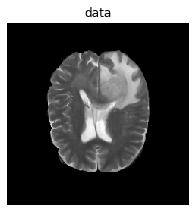

In [25]:
plt.figure(figsize=(15,10))

#input (5, 2, 155, 240, 240)
plt.subplot(141)
plt.title('data')
plt.axis('off')
plt.imshow(img_full[2,0,90, :, :],cmap='gray')
plt.show()

In [9]:
pip show tensorflow

Name: tensorflow
Version: 1.13.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: opensource@google.com
License: Apache 2.0
Location: c:\users\mediso\anaconda3\lib\site-packages
Requires: keras-applications, absl-py, six, keras-preprocessing, tensorflow-estimator, protobuf, termcolor, grpcio, wheel, tensorboard, astor, numpy, gast
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip show keras

Name: Keras
Version: 2.2.4
Summary: Deep Learning for humans
Home-page: https://github.com/keras-team/keras
Author: Francois Chollet
Author-email: francois.chollet@gmail.com
License: MIT
Location: c:\users\mediso\anaconda3\lib\site-packages
Requires: pyyaml, h5py, keras-preprocessing, scipy, numpy, keras-applications, six
Required-by: 
Note: you may need to restart the kernel to use updated packages.
